In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


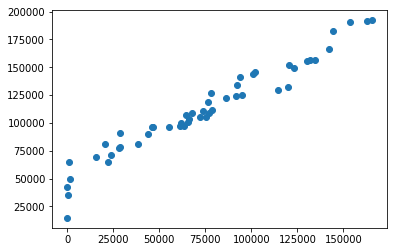

In [10]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'])

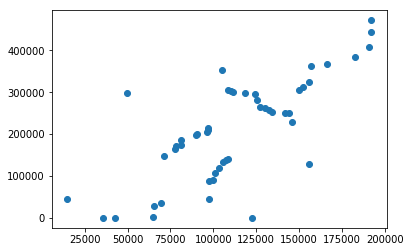

In [13]:
plt.scatter(dataset['Profit'], dataset['Marketing Spend'])

In [93]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
X[:5]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [94]:
# creating dummy variables to replace categorical values for numerical values
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
preprocess = make_column_transformer(
    (StandardScaler(),['R&D Spend','Administration','Marketing Spend']),
    # creating dummy variables to replace categorical values for numerical values
    (OneHotEncoder(),['State'])
)
# 'California' = 0, 'Florida' = 1, 'New York' = 2
X = preprocess.fit_transform(X)

In [95]:
# cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [97]:
len(X_test), len(X_train)

(10, 40)

In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
y_pred = pd.Series(regressor.predict(X_test))

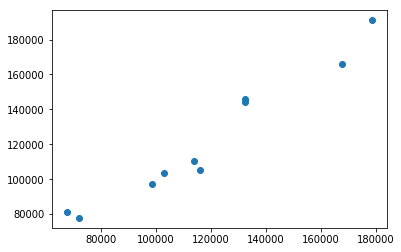

In [115]:
plt.scatter(y_pred, Y_test)